In [33]:
from glob import glob
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms
from tqdm import tqdm
import torch
from matplotlib import pyplot as plt

In [18]:
transform = transforms.ToTensor()


In [12]:
split_b_path = "/home/evgenii/Desktop/KneesOA/splits/"

In [13]:
splits_list = []
for stage in ["train", "test", "val"]:
    path = split_b_path + stage + '.csv'
    splits_list.append(pd.read_csv(path))

In [14]:
MEGA_split = pd.concat(splits_list)

In [15]:
MEGA_split

,img_path,target
0,/home/evgenii/Desktop/KneesOA/data/train/0/972...,0
1,/home/evgenii/Desktop/KneesOA/data/train/3/999...,3
2,/home/evgenii/Desktop/KneesOA/data/train/0/953...,0
3,/home/evgenii/Desktop/KneesOA/data/train/0/992...,0
4,/home/evgenii/Desktop/KneesOA/data/train/2/979...,2
...,...,...
821,/home/evgenii/Desktop/KneesOA/data/val/3/92174...,3
822,/home/evgenii/Desktop/KneesOA/data/val/3/99165...,3
823,/home/evgenii/Desktop/KneesOA/data/val/0/98911...,0
824,/home/evgenii/Desktop/KneesOA/data/val/0/99968...,0


In [21]:
tensors = []
for im_p in tqdm(MEGA_split["img_path"]):
    im = Image.open(im_p)
    tensors.append(transform(im))
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8864/8864 [00:08<00:00, 993.55it/s]


In [24]:
tensors = torch.cat(tensors)

In [28]:
tensors.mean(axis=[0, 1, 2])

tensor(0.6078)

In [29]:
tensors.std(axis=[0, 1, 2])

tensor(0.1933)

In [32]:
mean = 0.6078
std = 0.1933

In [67]:
transform_norm = transforms.Normalize(mean, std)

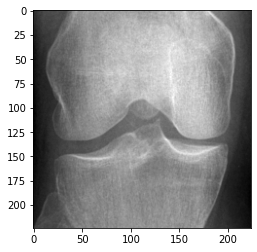

In [56]:
plt.imshow(Image.open(MEGA_split["img_path"].to_list()[17]), cmap="gray")

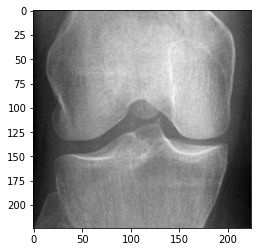

In [68]:
plt.imshow(transform_norm(transform(Image.open(MEGA_split["img_path"].to_list()[17]))).permute(1, 2, 0), cmap="gray")